In [5]:
!pip install PyQt5
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 31.6 MB/s 
     |████████████████████████████████| 59.9 MB 161 kB/s 
     |████████████████████████████████| 344 kB 72.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#import cifar10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

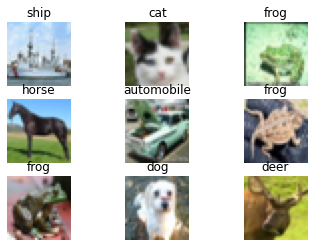

In [7]:
#5.1
import matplotlib.pyplot as plt #ok
from random import randrange
name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(3):
  for j in range(3):
    index = randrange(0, 50000)
    plt.subplot(3, 3, i*3+j+1) #從1開始 
    plt.title(str(name[y_train[index][0]]))
    plt.axis('off')
    plt.imshow(x_train[index])
plt.show()

In [29]:
#5.2
from tensorflow.keras.applications.vgg19 import VGG19
model = VGG19(classes=10,include_top=True,weights=None, input_shape=(32,32,3))

In [28]:
model.summary()
model.save('newVGG19.h5',model)

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [1]:
#5.4 train mymodel
from keras.metrics.metrics import CategoricalCrossentropy
from matplotlib.rcsetup import validate_path_exists
from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

def mymodel(nb_classes, input_shape):
  f=32
  input_tensor = Input(shape=input_shape, name='input')
  # 1st block
  x = Conv2D(f, (3,3), activation='relu', padding='same',name='block1_conv1')(input_tensor)
  x = Conv2D(f, (3,3), activation='relu', padding='same',name='block1_conv2')(x)
  x = MaxPooling2D((2,2), strides=(2,2), name = 'block1_pool')(x)
  # 2nd block
  x = Conv2D(f*2, (3,3), activation='relu', padding='same',name='block2_conv1')(x)
  x = Conv2D(f*2, (3,3), activation='relu', padding='same',name='block2_conv2')(x)
  x = MaxPooling2D((2,2), strides=(2,2), name = 'block2_pool')(x)
  # 3rd block
  x = Conv2D(f*3, (3,3), activation='relu', padding='same',name='block3_conv1')(x)
  x = Conv2D(f*3, (3,3), activation='relu', padding='same',name='block3_conv2')(x)
  x = Conv2D(f*3, (3,3), activation='relu', padding='same',name='block3_conv3')(x)
  x = Conv2D(f*3, (3,3), activation='relu', padding='same',name='block3_conv4')(x)
  x = MaxPooling2D((2,2), strides=(2,2), name = 'block3_pool')(x)
  # 4th block
  x = Conv2D(f*4, (3,3), activation='relu', padding='same',name='block4_conv1')(x)
  x = Conv2D(f*4, (3,3), activation='relu', padding='same',name='block4_conv2')(x)
  x = Conv2D(f*4, (3,3), activation='relu', padding='same',name='block4_conv3')(x)
  x = Conv2D(f*4, (3,3), activation='relu', padding='same',name='block4_conv4')(x)
  x = MaxPooling2D((2,2), strides=(2,2), name = 'block4_pool')(x)
  # 5th block
  x = Conv2D(f*5, (3,3), activation='relu', padding='same',name='block5_conv1')(x)
  x = Conv2D(f*5, (3,3), activation='relu', padding='same',name='block5_conv2')(x)
  x = Conv2D(f*5, (3,3), activation='relu', padding='same',name='block5_conv3')(x)
  x = Conv2D(f*5, (3,3), activation='relu', padding='same',name='block5_conv4')(x)
  x = MaxPooling2D((2,2), strides=(2,2), name = 'block5_pool')(x)
  # full connection
  x = Flatten()(x)
  x = Dense(f*20, activation='relu',  name='fc1')(x)
  x = Dense(f*20, activation='relu', name='fc2')(x)
  output_tensor = Dense(nb_classes, activation='softmax', name='predictions')(x)
  model = Model(input_tensor, output_tensor)
  return model
model=mymodel(10, (32, 32, 3))
model.save('model.h5',model)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 32)        896       
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 32)        9248      
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 32)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 64)        18496     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 64)        36928     
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 64)          0     

In [10]:
#編譯和訓練

import tensorflow
import numpy as np
from tensorflow.keras import utils
from tensorflow.keras.callbacks import Callback

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(50000, 32, 32, 3).astype('float32')
x_test = x_test.reshape(10000, 32, 32, 3).astype('float32')

# Normalization
x_train_n = x_train / 255
x_test_n = x_test / 255

# Transfer image label
y_train_o = utils.to_categorical(y_train)
y_test_o = utils.to_categorical(y_test)
scores = np.zeros((2,30),dtype=np.float32)

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        (scores[0][epoch], scores[1][epoch]) = model.evaluate(x_test_n, y_test_o, verbose=2)
        print("Loss: {:.4f} - Accuracy: {:.4f}\n".format(scores[0][epoch],scores[1][epoch]))

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, 
              loss=categorical_crossentropy,
               metrics=['accuracy'])
history=model.fit(
    x=x_train_n,
    y=y_train_o,
    batch_size=50,
    epochs=30,
    shuffle=True,
    validation_split=0,
    verbose=2,
    #validation_freq=10,
    callbacks=[CustomCallback()]
)
#model.evaluate(
#    x_test_n, y_test, batch_size=128, verbose=0, callbacks=[CustomCallback()]
#)
#model.predict(x_test_n, batch_size=200, callbacks=[CustomCallback()])

Epoch 1/30
313/313 - 4s - loss: 2.3037 - accuracy: 0.1000 - 4s/epoch - 13ms/step
Loss: 2.3037 - Accuracy: 0.1000

1000/1000 - 51s - loss: 13.6597 - accuracy: 0.1012 - 51s/epoch - 51ms/step
Epoch 2/30
313/313 - 3s - loss: 2.3028 - accuracy: 0.1000 - 3s/epoch - 11ms/step
Loss: 2.3028 - Accuracy: 0.1000

1000/1000 - 48s - loss: 2.3038 - accuracy: 0.0988 - 48s/epoch - 48ms/step
Epoch 3/30
313/313 - 3s - loss: 2.3036 - accuracy: 0.1000 - 3s/epoch - 11ms/step
Loss: 2.3036 - Accuracy: 0.1000

1000/1000 - 48s - loss: 2.3037 - accuracy: 0.0972 - 48s/epoch - 48ms/step
Epoch 4/30
313/313 - 3s - loss: 2.3032 - accuracy: 0.1000 - 3s/epoch - 11ms/step
Loss: 2.3032 - Accuracy: 0.1000

1000/1000 - 48s - loss: 2.3035 - accuracy: 0.0988 - 48s/epoch - 48ms/step
Epoch 5/30
313/313 - 3s - loss: 2.3036 - accuracy: 0.1000 - 3s/epoch - 11ms/step
Loss: 2.3036 - Accuracy: 0.1000

1000/1000 - 48s - loss: 2.3035 - accuracy: 0.0977 - 48s/epoch - 48ms/step
Epoch 6/30
313/313 - 3s - loss: 2.3034 - accuracy: 0.1000 -

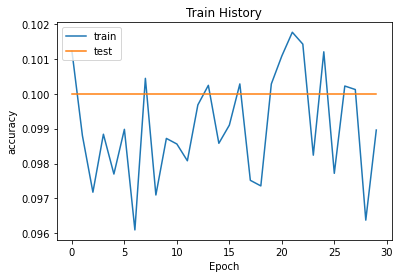

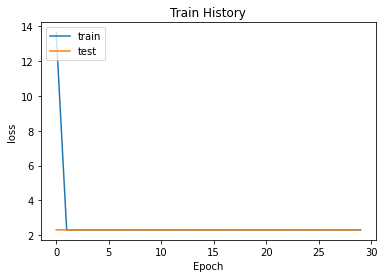

In [34]:
def train_history(history, train, test):
  plt.plot(history.history[train])
  plt.plot(scores[test])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc = 'upper left')
  if train=='accuracy':
      plt.savefig('my_plot'+'accuracy'+'.jpg')
  if train=='loss':
      plt.savefig('my_plot'+'loss'+'.jpg')
  plt.show()
train_history(history,'accuracy',1)
train_history(history,'loss',0)

Mounted at /content/drive


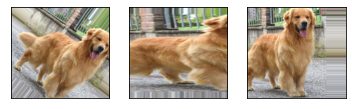

In [12]:
#5.3
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow
#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')
#change the directory
os.chdir('/content/drive/MyDrive/影像辨識/HW')
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
img=tensorflow.keras.preprocessing.image.load_img('dog.jpg')
data = img_to_array(img)
samples = expand_dims(data, 0)
for i in range(3):
  if i==0:
    datagen = ImageDataGenerator(rotation_range=90)
    _ = datagen.flow(samples, batch_size=1)
  if i==1:
    datagen = ImageDataGenerator(zoom_range=[0,1.5])
    _ = datagen.flow(samples, batch_size=1)
  if i==2:
    datagen = ImageDataGenerator(height_shift_range=[-200,200])
    _ = datagen.flow(samples, batch_size=1)
  batch = _.next()
  image = batch[0].astype('uint8')
  plt.subplot(130+1+i)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
plt.show()

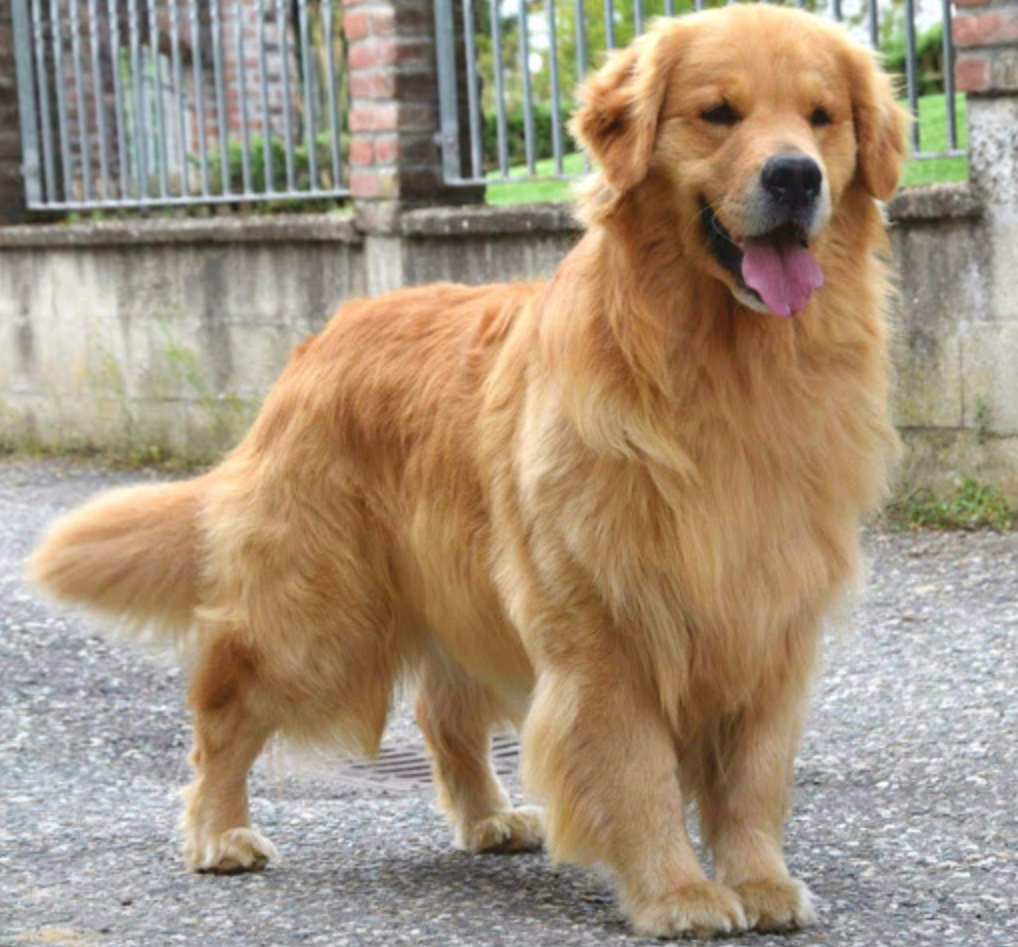

In [13]:
##load 5.3 image
tensorflow.keras.preprocessing.image.load_img('dog.jpg')

In [22]:
#5.4

##load 5.4 image
test_img=index = randrange(0, 50000)
index = randrange(0, 50000)

model.evaluate(
   x_test_n, y_test, batch_size=50, verbose=2, callbacks=[CustomCallback()]
)
name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
prediction = model.predict(x_test(index,(32,32,3)), batch_size=50, callbacks=[CustomCallback()])
fig, ax = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(16)
ax[0].imshow(x_test[index])
ax[0].set_axis_off()
ax[1].bar(name, prediction[0])
ax[1].set_ylim(0, 1)
ax[1].set_xticklabels(name, rotation=45, ha='right')
plt.show()

ValueError: ignored